# Part 2 - Header Distributions

The purpose of this notebook is to investigate the data distribution and get some more insight into the class distribution and how it may affect the training.

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import pydicom

from rnsa_funcs import *

import os

import sklearn as sk
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

In [4]:
#Setup path locations
BASE_PATH = 'G:\Kaggle\RSNA_Comp'
TRAIN_PATH_RAW = 'G:\Kaggle\RSNA_Comp\stage_1_train_images'
TEST_PATH_RAW = 'G:\Kaggle\RSNA_Comp\stage_1_test_images'
TRAIN_PATH_CLEAN = 'G:\Kaggle\RSNA_Comp\\train_image_clean'
TEST_PATH_CLEAN = 'G:\Kaggle\RSNA_Comp\\test_image_clean'

In [4]:
#Import base data
train_labels = pd.read_csv(os.path.join(BASE_PATH, 'stage_1_train_labels.csv'))
test_full = pd.read_csv(os.path.join(TEST_PATH_CLEAN, 'test_full.csv'))
train_full = pd.read_csv(os.path.join(TRAIN_PATH_CLEAN, 'train_full.csv'))

In [4]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(train_full.head(5))


,Unnamed: 0,patientId,class,Target,SpecificCharacterSet,SOPClassUID,SOPInstanceUID,StudyDate,StudyTime,AccessionNumber,Modality,ConversionType,ReferringPhysiciansName,SeriesDescription,PatientsBirthDate,PatientsSex,PatientsAge,BodyPartExamined,ViewPosition,StudyInstanceUID,SeriesInstanceUID,StudyID,SeriesNumber,InstanceNumber,PatientOrientation,SamplesperPixel,PhotometricInterpretation,Rows,Columns,PixelSpacing,BitsAllocated,BitsStored,HighBit,PixelRepresentation,LossyImageCompression,LossyImageCompressionMethod
0,0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal,0,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.28530.15178744...,19010101,0.0,NaN,CR,WSD,NaN,view: PA,NaN,F,51,CHEST,PA,1.2.276.0.7230010.3.1.2.8323329.28530.15178744...,1.2.276.0.7230010.3.1.3.8323329.28530.15178744...,NaN,1,1,NaN,1,MONOCHROME2,1024,1024,0.1430,8,8,7,0,1,ISO_10918_1
1,1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal,0,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.26024.15178744...,19010101,0.0,NaN,CR,WSD,NaN,view: PA,NaN,F,48,CHEST,PA,1.2.276.0.7230010.3.1.2.8323329.26024.15178744...,1.2.276.0.7230010.3.1.3.8323329.26024.15178744...,NaN,1,1,NaN,1,MONOCHROME2,1024,1024,0.1943,8,8,7,0,1,ISO_10918_1
2,2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal,0,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.11252.15178743...,19010101,0.0,NaN,CR,WSD,NaN,view: AP,NaN,M,19,CHEST,AP,1.2.276.0.7230010.3.1.2.8323329.11252.15178743...,1.2.276.0.7230010.3.1.3.8323329.11252.15178743...,NaN,1,1,NaN,1,MONOCHROME2,1024,1024,0.1680,8,8,7,0,1,ISO_10918_1
3,3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal,0,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.2293.151787429...,19010101,0.0,NaN,CR,WSD,NaN,view: PA,NaN,M,28,CHEST,PA,1.2.276.0.7230010.3.1.2.8323329.2293.151787429...,1.2.276.0.7230010.3.1.3.8323329.2293.151787429...,NaN,1,1,NaN,1,MONOCHROME2,1024,1024,0.1430,8,8,7,0,1,ISO_10918_1
4,4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,1,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.6379.151787432...,19010101,0.0,NaN,CR,WSD,NaN,view: AP,NaN,F,32,CHEST,AP,1.2.276.0.7230010.3.1.2.8323329.6379.151787432...,1.2.276.0.7230010.3.1.3.8323329.6379.151787432...,NaN,1,1,NaN,1,MONOCHROME2,1024,1024,0.1390,8,8,7,0,1,ISO_10918_1


In [5]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(train_full.describe())


,Unnamed: 0,Target,StudyDate,StudyTime,AccessionNumber,ReferringPhysiciansName,PatientsBirthDate,PatientsAge,StudyID,SeriesNumber,InstanceNumber,PatientOrientation,SamplesperPixel,Rows,Columns,PixelSpacing,BitsAllocated,BitsStored,HighBit,PixelRepresentation,LossyImageCompression
count,25684.000000,25684.000000,25684.0,25684.0,0.0,0.0,0.0,25684.000000,0.0,25684.0,25684.0,0.0,25684.0,25684.0,25684.0,25684.000000,25684.0,25684.0,25684.0,25684.0,25684.0
mean,12841.500000,0.220332,19010101.0,0.0,NaN,NaN,NaN,47.023478,NaN,1.0,1.0,NaN,1.0,1024.0,1024.0,0.155136,8.0,8.0,7.0,0.0,1.0
std,7414.476493,0.414478,0.0,0.0,NaN,NaN,NaN,16.831538,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.015988,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,19010101.0,0.0,NaN,NaN,NaN,1.000000,NaN,1.0,1.0,NaN,1.0,1024.0,1024.0,0.115000,8.0,8.0,7.0,0.0,1.0
25%,6420.750000,0.000000,19010101.0,0.0,NaN,NaN,NaN,34.000000,NaN,1.0,1.0,NaN,1.0,1024.0,1024.0,0.143000,8.0,8.0,7.0,0.0,1.0
50%,12841.500000,0.000000,19010101.0,0.0,NaN,NaN,NaN,49.000000,NaN,1.0,1.0,NaN,1.0,1024.0,1024.0,0.143000,8.0,8.0,7.0,0.0,1.0
75%,19262.250000,0.000000,19010101.0,0.0,NaN,NaN,NaN,59.000000,NaN,1.0,1.0,NaN,1.0,1024.0,1024.0,0.168000,8.0,8.0,7.0,0.0,1.0
max,25683.000000,1.000000,19010101.0,0.0,NaN,NaN,NaN,155.000000,NaN,1.0,1.0,NaN,1.0,1024.0,1024.0,0.198900,8.0,8.0,7.0,0.0,1.0


### Notes from basic data describe
* 0.22 mean on target shows strong target imbalance towards 0
* Max age is 155 which is older than the oldest human alive - age should be clipped
* All images are 1024x1024 with only discriminating factor being the pixel spacing

In [6]:
train_full.nunique()

Unnamed: 0                     25684
patientId                      25684
class                              3
Target                             2
SpecificCharacterSet               1
SOPClassUID                        1
SOPInstanceUID                 25684
StudyDate                          1
StudyTime                          1
AccessionNumber                    0
Modality                           1
ConversionType                     1
ReferringPhysiciansName            0
SeriesDescription                  2
PatientsBirthDate                  0
PatientsSex                        2
PatientsAge                       97
BodyPartExamined                   1
ViewPosition                       2
StudyInstanceUID               25684
SeriesInstanceUID              25684
StudyID                            0
SeriesNumber                       1
InstanceNumber                     1
PatientOrientation                 0
SamplesperPixel                    1
PhotometricInterpretation          1
R

Looking at the number of unique variable instances it seems like a lot of these variables do not contain any data.

In [7]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(test_full.describe())

,Unnamed: 0,StudyDate,StudyTime,AccessionNumber,ReferringPhysiciansName,PatientsBirthDate,PatientsAge,StudyID,SeriesNumber,InstanceNumber,PatientOrientation,SamplesperPixel,Rows,Columns,PixelSpacing,BitsAllocated,BitsStored,HighBit,PixelRepresentation,LossyImageCompression
count,1000.000000,1000.0,1000.0,0.0,0.0,0.0,1000.000000,0.0,1000.0,1000.0,0.0,1000.0,1000.0,1000.0,1000.000000,1000.0,1000.0,1000.0,1000.0,1000.0
mean,499.500000,19010101.0,0.0,NaN,NaN,NaN,47.198000,NaN,1.0,1.0,NaN,1.0,1024.0,1024.0,0.155118,8.0,8.0,7.0,0.0,1.0
std,288.819436,0.0,0.0,NaN,NaN,NaN,16.270265,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.016037,0.0,0.0,0.0,0.0,0.0
min,0.000000,19010101.0,0.0,NaN,NaN,NaN,3.000000,NaN,1.0,1.0,NaN,1.0,1024.0,1024.0,0.139000,8.0,8.0,7.0,0.0,1.0
25%,249.750000,19010101.0,0.0,NaN,NaN,NaN,34.000000,NaN,1.0,1.0,NaN,1.0,1024.0,1024.0,0.143000,8.0,8.0,7.0,0.0,1.0
50%,499.500000,19010101.0,0.0,NaN,NaN,NaN,50.000000,NaN,1.0,1.0,NaN,1.0,1024.0,1024.0,0.143000,8.0,8.0,7.0,0.0,1.0
75%,749.250000,19010101.0,0.0,NaN,NaN,NaN,59.000000,NaN,1.0,1.0,NaN,1.0,1024.0,1024.0,0.168000,8.0,8.0,7.0,0.0,1.0
max,999.000000,19010101.0,0.0,NaN,NaN,NaN,91.000000,NaN,1.0,1.0,NaN,1.0,1024.0,1024.0,0.194300,8.0,8.0,7.0,0.0,1.0


In [8]:
test_full.nunique()

Unnamed: 0                     1000
patientId                      1000
SpecificCharacterSet              1
SOPClassUID                       1
SOPInstanceUID                 1000
StudyDate                         1
StudyTime                         1
AccessionNumber                   0
Modality                          1
ConversionType                    1
ReferringPhysiciansName           0
SeriesDescription                 2
PatientsBirthDate                 0
PatientsSex                       2
PatientsAge                      79
BodyPartExamined                  1
ViewPosition                      2
StudyInstanceUID               1000
SeriesInstanceUID              1000
StudyID                           0
SeriesNumber                      1
InstanceNumber                    1
PatientOrientation                0
SamplesperPixel                   1
PhotometricInterpretation         1
Rows                              1
Columns                           1
PixelSpacing                

This is consistent across the test set also so the variables can be safely culled without losing any information.

Also series description is a copy of the variable viewposition so this can also be safely removed without any data loss.

In [5]:
def cull_variables(df):
    df = df.drop(['Unnamed: 0', 'SpecificCharacterSet', 'SOPClassUID','StudyDate', 'StudyTime','' 
                 'AccessionNumber', 'Modality','ConversionType', 'ReferringPhysiciansName','PatientsBirthDate', 
                 'BodyPartExamined','StudyID','SeriesNumber','InstanceNumber', 'PatientOrientation', 
                 'SamplesperPixel','Rows', 'Columns','BitsAllocated', 'BitsStored','HighBit',
                 'PixelRepresentation', 'LossyImageCompression', 'LossyImageCompressionMethod',
                 'PhotometricInterpretation', 'SeriesDescription'], axis=1)
    
    df['PatientsAge'] = np.clip(df['PatientsAge'], 0, 100)
    return df

In [6]:
train_cull = cull_variables(train_full)
test_cull = cull_variables(test_full)

In [11]:
train_cull.head(5)

,patientId,class,Target,SOPInstanceUID,PatientsSex,PatientsAge,ViewPosition,StudyInstanceUID,SeriesInstanceUID,PixelSpacing
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal,0,1.2.276.0.7230010.3.1.4.8323329.28530.15178744...,F,51,PA,1.2.276.0.7230010.3.1.2.8323329.28530.15178744...,1.2.276.0.7230010.3.1.3.8323329.28530.15178744...,0.1430
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal,0,1.2.276.0.7230010.3.1.4.8323329.26024.15178744...,F,48,PA,1.2.276.0.7230010.3.1.2.8323329.26024.15178744...,1.2.276.0.7230010.3.1.3.8323329.26024.15178744...,0.1943
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal,0,1.2.276.0.7230010.3.1.4.8323329.11252.15178743...,M,19,AP,1.2.276.0.7230010.3.1.2.8323329.11252.15178743...,1.2.276.0.7230010.3.1.3.8323329.11252.15178743...,0.1680
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal,0,1.2.276.0.7230010.3.1.4.8323329.2293.151787429...,M,28,PA,1.2.276.0.7230010.3.1.2.8323329.2293.151787429...,1.2.276.0.7230010.3.1.3.8323329.2293.151787429...,0.1430
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,1,1.2.276.0.7230010.3.1.4.8323329.6379.151787432...,F,32,AP,1.2.276.0.7230010.3.1.2.8323329.6379.151787432...,1.2.276.0.7230010.3.1.3.8323329.6379.151787432...,0.1390


So outside of text mining the ID fields there's only really 4 variables here - 
1. Sex
2. Age
3. ViewPosition
4. PixelSpacing

Pixel spacing and viewposition are variables to do with the way the x-ray was taken and age and sex are obviously to do with the patient.

Another thing to note is that looking online - https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/discussion/64620 specifically.  It appears that view position PA = standing up and AP means lieing down, and the main reason x-rays are taken in the lieing down position is if the patient physically cannot stand.  This means that viewposition is heavily correlated with the target.

In [7]:
def strip_ids(df):
    df = df.drop(['SOPInstanceUID','StudyInstanceUID', 'SeriesInstanceUID' ], axis=1)
    
    return df

In [8]:
train_stp = strip_ids(train_cull)
test_stp = strip_ids(test_cull)

In [14]:
train_stp.head(5)

,patientId,class,Target,PatientsSex,PatientsAge,ViewPosition,PixelSpacing
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal,0,F,51,PA,0.1430
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal,0,F,48,PA,0.1943
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal,0,M,19,AP,0.1680
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal,0,M,28,PA,0.1430
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,1,F,32,AP,0.1390


## Visualizations

### Age and Gender

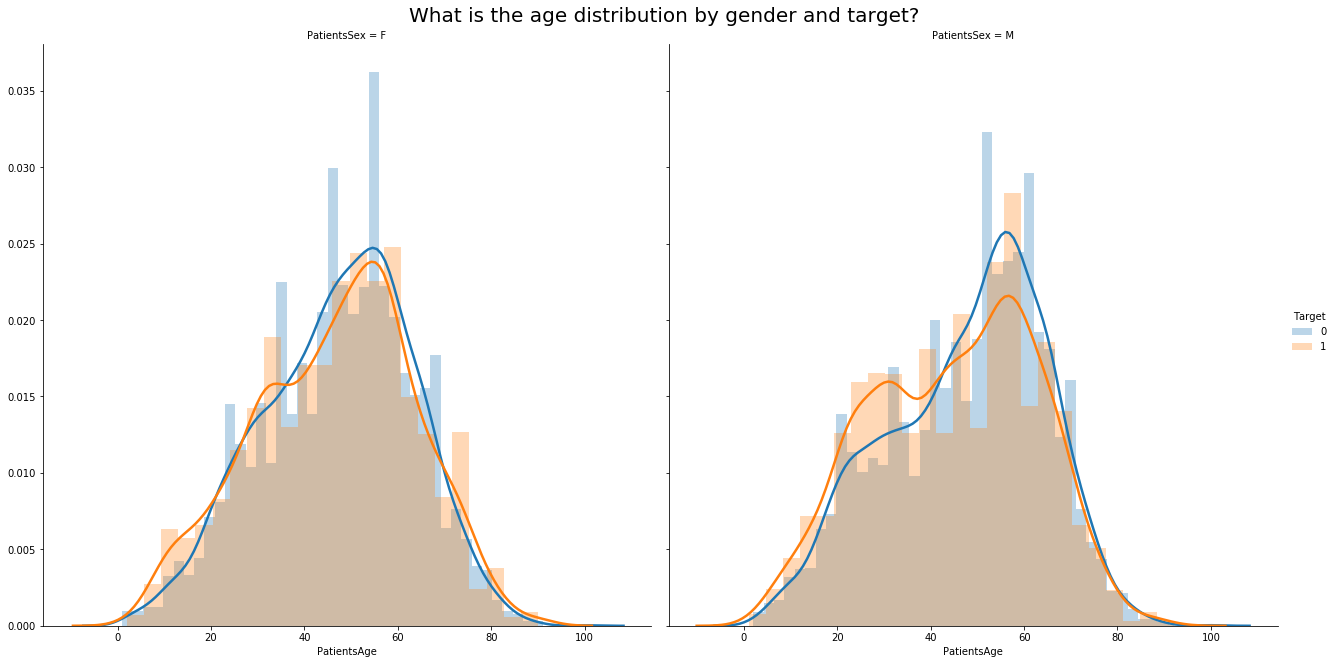

In [20]:
g = sns.FacetGrid(col='PatientsSex', hue='Target', 
                  data=train_stp, 
                  height=9)
_ = g.map(sns.distplot, 'PatientsAge', hist_kws={'alpha': 0.3}).add_legend()
_ = g.fig.suptitle("What is the age distribution by gender and target?", y=1.02, fontsize=20)

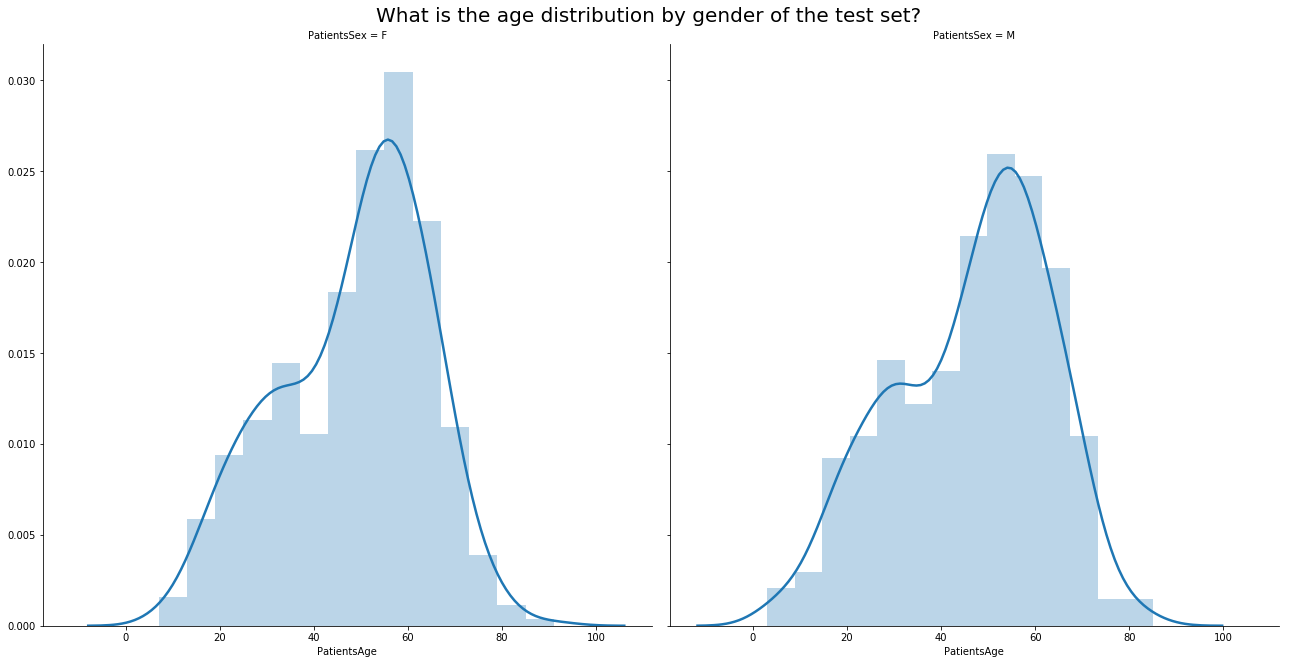

In [21]:
g = sns.FacetGrid(col='PatientsSex', 
                  data=test_stp, 
                  height=9)
_ = g.map(sns.distplot, 'PatientsAge', hist_kws={'alpha': 0.3}).add_legend()
_ = g.fig.suptitle("What is the age distribution by gender of the test set?", y=1.02, fontsize=20)


### Viewposition and gender

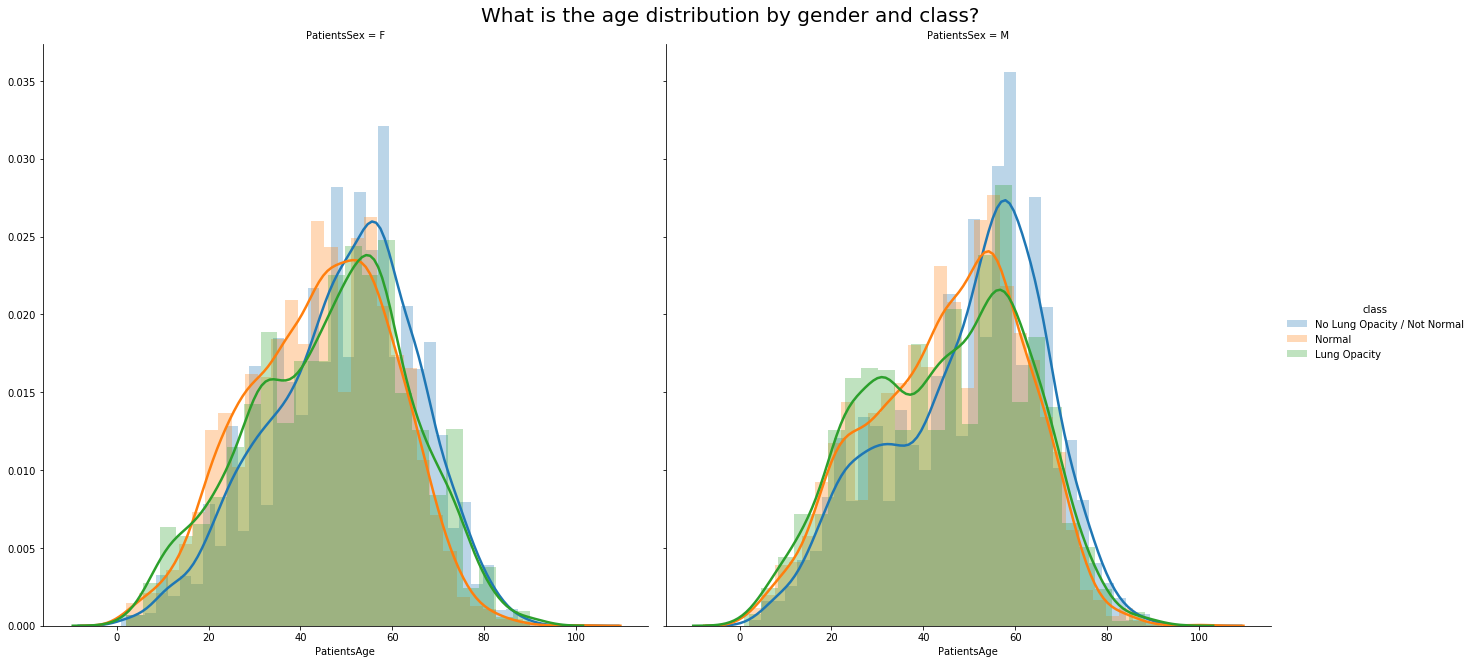

In [22]:
g = sns.FacetGrid(col='PatientsSex', hue='class', 
                  data=train_stp, 
                  height=9)
_ = g.map(sns.distplot, 'PatientsAge', hist_kws={'alpha': 0.3}).add_legend()
_ = g.fig.suptitle("What is the age distribution by gender and class?", y=1.02, fontsize=20)

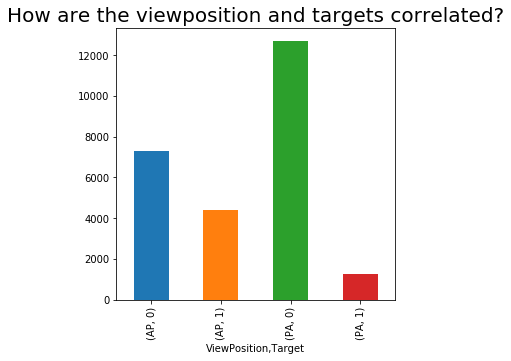

In [48]:
viewpos_vc = train_stp.groupby(['ViewPosition', 'Target'])['class'].count()
ax = viewpos_vc.plot.bar()
plt.rc('figure', figsize=(5,5))
_ = ax.set_title('How are the viewposition and targets correlated?', fontsize=20)

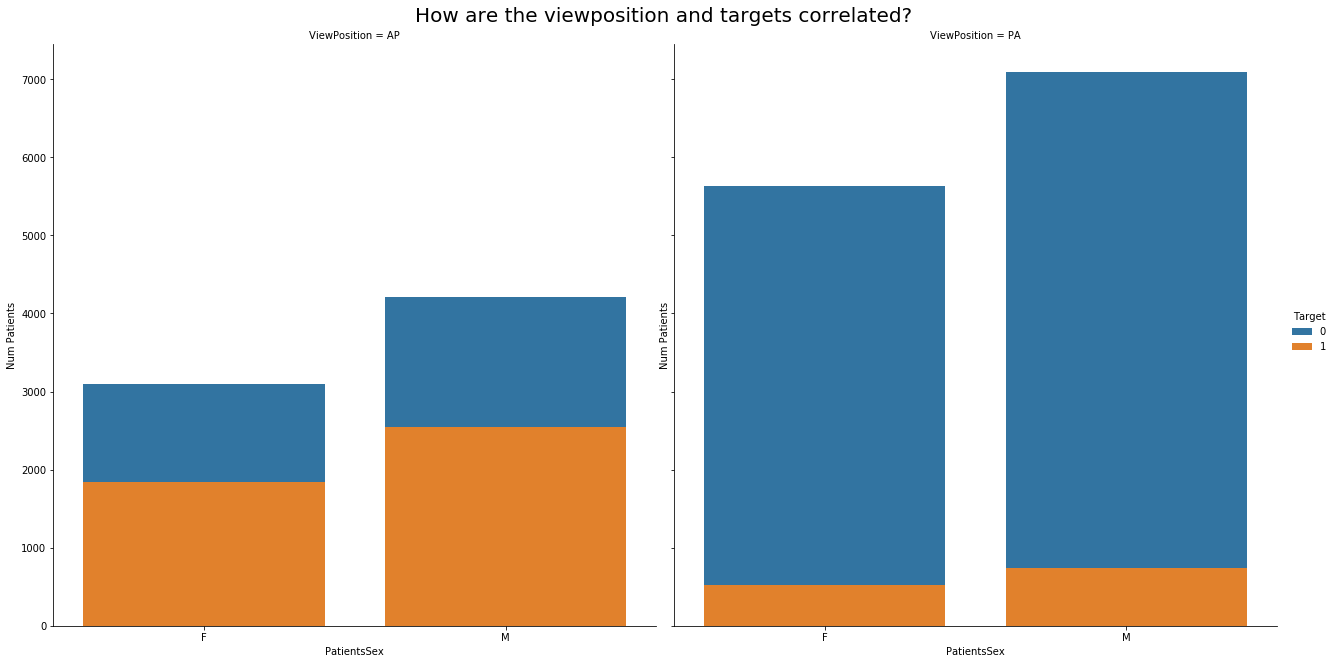

In [24]:
viewpos_vc = train_stp.groupby(['ViewPosition','Target', 'PatientsSex'])['patientId'].count().reset_index()

g = sns.FacetGrid(col='ViewPosition', hue='Target', 
                  data=viewpos_vc, 
                  height=9)
_ = g.map(sns.barplot, 'PatientsSex', 'patientId').add_legend()
_ = g.set(ylabel='Num Patients')
_ = g.fig.suptitle("How are the viewposition and targets correlated?", y=1.02, fontsize=20)

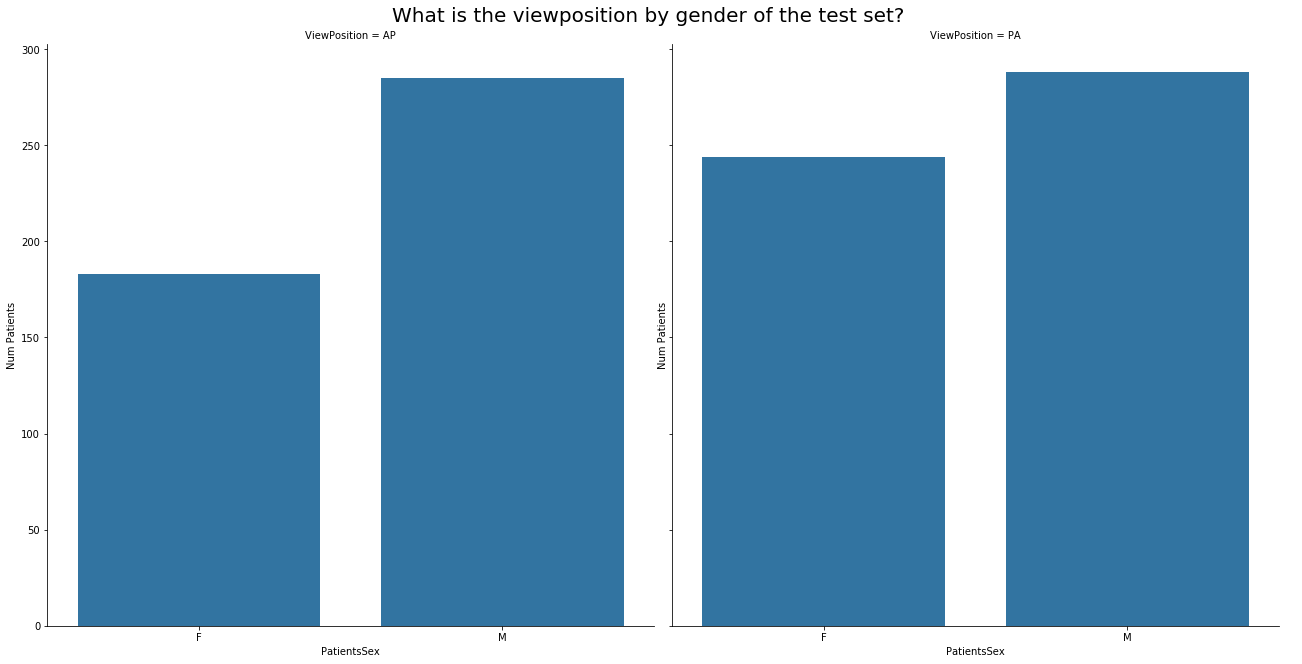

In [25]:
viewpos_vc2 = test_stp.groupby(['ViewPosition', 'PatientsSex'])['patientId'].count().reset_index()

g = sns.FacetGrid(col='ViewPosition', 
                  data=viewpos_vc2, 
                  height=9)
_ = g.map(sns.barplot, 'PatientsSex', 'patientId').add_legend()
_ = g.set(ylabel='Num Patients')
_ = g.fig.suptitle("What is the viewposition by gender of the test set?", y=1.02, fontsize=20)

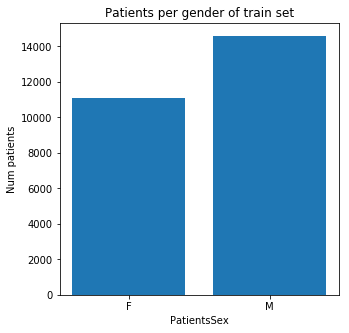

In [35]:
sex_vc = train_stp.groupby(['PatientsSex'])['patientId'].count().reset_index()

plt.bar(sex_vc['PatientsSex'], sex_vc['patientId'])
plt.ylabel('Num patients')
plt.xlabel('PatientsSex')
plt.rc('figure', figsize=(5,5))
plt.title("Patients per gender of train set")
plt.show()

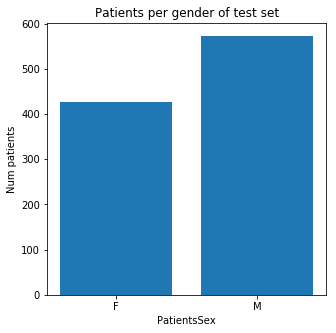

In [36]:
sex_vc2 = test_stp.groupby(['PatientsSex'])['patientId'].count().reset_index()

plt.bar(sex_vc2['PatientsSex'], sex_vc2['patientId'])
plt.ylabel('Num patients')
plt.xlabel('PatientsSex')
plt.rc('figure', figsize=(5,5))
plt.title("Patients per gender of test set")
plt.show()

## X-Ray image Visualizations

### Lung Opacity (target == 1)

In [16]:
t_one = train_stp[train_stp['class'] == 'Lung Opacity'].tail(3)
t_one

,patientId,class,Target,PatientsSex,PatientsAge,ViewPosition,PixelSpacing
25663,ffd787b6-59ca-48cb-bd15-bcedd52cf37c,Lung Opacity,1,M,33,AP,0.168
25675,fff0b503-72a5-446a-843d-f3d152e39053,Lung Opacity,1,M,62,AP,0.168
25679,fffb2395-8edd-4954-8a89-ffe2fd329be3,Lung Opacity,1,M,46,AP,0.168


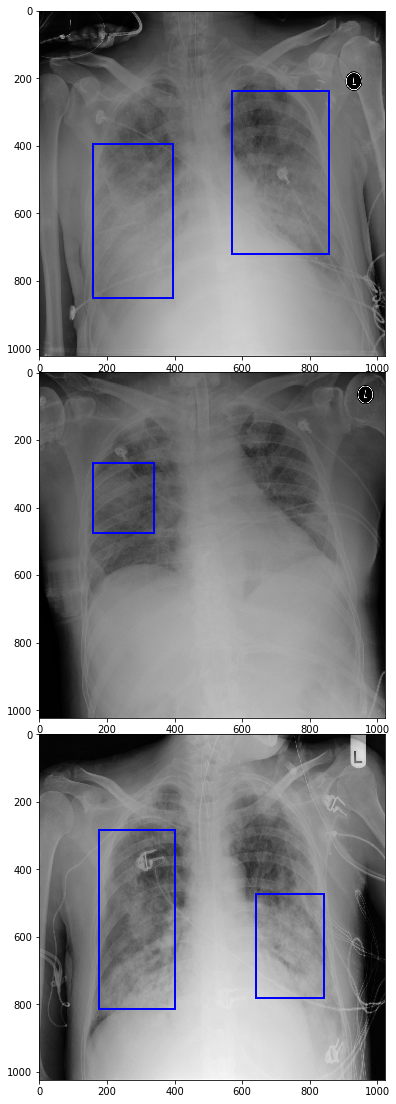

In [46]:
Drawimg_from_DF(t_one, TRAIN_PATH_RAW, train_labels, 15)

In [37]:
t_nn = train_stp[train_stp['class'] == 'No Lung Opacity / Not Normal'].tail(3)
t_nn

,patientId,class,Target,PatientsSex,PatientsAge,ViewPosition,PixelSpacing
25681,fffc95b5-605b-4226-80ab-62caec682b22,No Lung Opacity / Not Normal,0,F,30,AP,0.139
25682,fffcff11-d018-4414-971a-a7cefa327795,No Lung Opacity / Not Normal,0,M,47,PA,0.143
25683,fffec09e-8a4a-48b1-b33e-ab4890ccd136,No Lung Opacity / Not Normal,0,M,45,AP,0.139


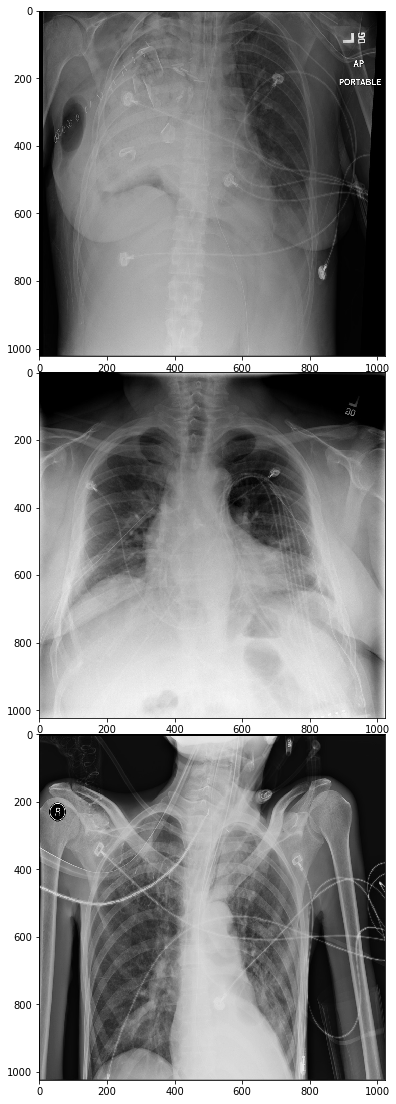

In [42]:
Drawimg_from_DF(t_nn, TRAIN_PATH_RAW, train_labels, 15)

In [44]:
t_norm = train_stp[train_stp['class'] == 'Normal'].tail(3)
t_norm

,patientId,class,Target,PatientsSex,PatientsAge,ViewPosition,PixelSpacing
25669,ffe16061-b19f-4333-8a03-b41aab42b47d,Normal,0,F,42,PA,0.143
25677,fff50447-821b-4b72-ae91-22b0679d6d3e,Normal,0,M,41,AP,0.139
25680,fffba05a-1635-4545-9bbd-57ad4cfe8d27,Normal,0,M,31,PA,0.143


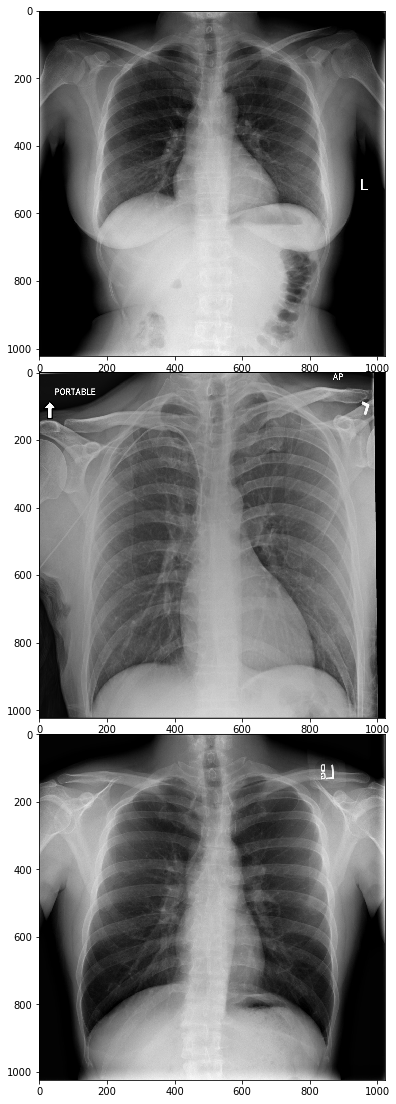

In [45]:
Drawimg_from_DF(t_norm, TRAIN_PATH_RAW, train_labels, 15)

Interestingly in the images displayed the not-normal images all seem to have various medical wires on the patient whereas the normal images do not.  However as this is a very small sample size it is possibly a coincidence.  Also looking at the images it may be necessary to have seperate models by gender in order to boost accuracy.

## Validation Strategy

With this in mind it is wise to setup an initial validation strategy now (which can be returned to or explanded at a later date if necessary).

For a simple validation strategy I will use a holdout set which I can then further split if necessary (for hyperparameter tuning).  Approximately 10% split should be fine, however this will need to be stratified to match the variable distribution of the test set if possible.

For this stratification I will band the ages and then use an age/gender/viewposition stratified split.

As the test and train sets have roughly the same distributions, attempting to mimic this distribution for the dev set should give the most reliable results such that improvement on the dev set should yield improvements on the test set.

In [49]:
train_stp.head(5)

,patientId,class,Target,PatientsSex,PatientsAge,ViewPosition,PixelSpacing
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal,0,F,51,PA,0.1430
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal,0,F,48,PA,0.1943
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal,0,M,19,AP,0.1680
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal,0,M,28,PA,0.1430
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,1,F,32,AP,0.1390


In [9]:
def Band_data(df):
    bins = [0, 18, 30, 40, 50, 60, 70, 80, 150]
    df['Age_Band'] = pd.cut(df['PatientsAge'], bins)
    
    return df

In [10]:
train_bnd = Band_data(train_stp)
test_bnd = Band_data(test_stp)

In [11]:
train_bnd['Target_adv'] = train_bnd['class'].map( {'Normal': 0, 'Lung Opacity': 2,
                                                  'No Lung Opacity / Not Normal' : 1} ).astype(int)
train_bnd = train_bnd.drop('class', axis=1)

In [12]:
train_bnd.head(5)

,patientId,Target,PatientsSex,PatientsAge,ViewPosition,PixelSpacing,Age_Band,Target_adv
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0,F,51,PA,0.1430,"(50, 60]",1
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,0,F,48,PA,0.1943,"(40, 50]",1
2,00322d4d-1c29-4943-afc9-b6754be640eb,0,M,19,AP,0.1680,"(18, 30]",1
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,0,M,28,PA,0.1430,"(18, 30]",0
4,00436515-870c-4b36-a041-de91049b9ab4,1,F,32,AP,0.1390,"(30, 40]",2


In [13]:
def Validation_Split(df, val_perc, seed):
    #Getting unique values in columns to stratify
    sex = df.PatientsSex.unique()
    pos = df.ViewPosition.unique()
    ageband = df.Age_Band.unique()
    
    #Setting up dataframes
    train_df = df[0:0]
    val_df = df[0:0]
    
    #Dropping target as stratifying by class
    val_df = val_df.drop('Target', axis=1)
    train_df = train_df.drop('Target', axis=1)
    
    for i in sex:
        for j in pos:
            #( ͡° ͜ʖ ͡°) 
            for k in ageband:
                #Seperate out band to stratify
                X_Split = df[(df['PatientsSex'] == i) & 
                            (df['ViewPosition'] == j) &
                            (df['Age_Band'] == k)]
                
                
                
                #Get Targets
                Target_split = X_Split['Target'].copy()
                Target_Adv_split = X_Split['Target_adv'].copy()
                X_Split = X_Split.drop(['Target','Target_adv'],axis=1)
                
                #Stratify data
                X_Train, X_Val, Y_Train, Y_Val = train_test_split(X_Split, Target_Adv_split, 
                                                                  test_size=val_perc,
                                                                  random_state= seed)
                
                #Merge targets back on to original dataframe
                X_Train['Target_adv'] = Y_Train
                X_Val['Target_adv'] = Y_Val
                
                #Append dataframes together to get final stratified split
                train_df = train_df.append(X_Train)
                val_df = val_df.append(X_Val)
                
                del X_Train, X_Val, Y_Train, Y_Val, Target_split, Target_Adv_split
    
    return train_df, val_df

In [14]:
train_frame, val_frame = Validation_Split(train_bnd, 0.1, 1324)

In [15]:
train_frame.shape

(23098, 7)

In [16]:
val_frame.shape

(2586, 7)

In [17]:
train_frame.groupby('Target_adv')['patientId'].count()

Target_adv
0     7672
1    10319
2     5107
Name: patientId, dtype: int64

In [18]:
val_frame.groupby('Target_adv')['PatientsSex'].count()

Target_adv
0     853
1    1181
2     552
Name: PatientsSex, dtype: int64

So looking at the split we have accurately created a stratified training and validation split for each of the variables.  Replacing Target_adv with any of the other variables for each of the above dataframes shows that the split is approximately even at 90-10 between the training and validation dataframes.

Now let's split the validation set in half across the same validation and that should be a solid validation schema, at least for getting started.

In [19]:
#Adding target to avoid errors
val_frame['Target'] = 0

val_1_frame, val_2_frame = Validation_Split(val_frame, 0.5, 5678)

In [20]:
val_1_frame.shape

(1284, 7)

In [21]:
val_2_frame.shape

(1302, 7)

Now we have a 90-5-5 split of training to validation data.  For generating a deeper stacked ensemble later on this training set should be split using k-fold validation to generate oof metafeatures, however for now this will serve well as a training, hyperparameter tuning, final validation split.

However as these dataframes were generated procedurally they are currently sorted in a particular order in accordance to how they were stratified.  For any batch training procedure this can distort the way the algorithm trains, thus to account for this I will re-shuffle each of the dataframes into a random order (with the exception of the test dataframe).

In [1]:
def Shuffle_DF(df):
    shuffled_df = df.reindex(np.random.permutation(df.index))
    shuffled_df = shuffled_df.sort_index()
    return shuffled_df

In [6]:
train_shfl = Shuffle_DF(train_frame)
val_1_shfl = Shuffle_DF(val_1_frame)
val_2_shfl = Shuffle_DF(val_2_frame)

In [7]:
val_2_frame.head(5)

,patientId,PatientsSex,PatientsAge,ViewPosition,PixelSpacing,Age_Band,Target_adv
0,ee7fec9a-c1fb-43d4-8e2d-704de5a3ab2e,F,52,PA,0.143,"(50, 60]",1
1,4b59a919-a8db-432f-a60e-ce67bf52c6b1,F,56,PA,0.143,"(50, 60]",0
2,dd84fb76-ce09-4dff-811e-a25e82bbbc3f,F,55,PA,0.143,"(50, 60]",1
3,edf403ee-b1d3-48fd-ba15-c9a431d41246,F,60,PA,0.143,"(50, 60]",1
4,94b59e87-d849-425d-973f-a34b30330a82,F,55,PA,0.143,"(50, 60]",1


In [8]:
val_2_shfl.head(5)

,patientId,PatientsSex,PatientsAge,ViewPosition,PixelSpacing,Age_Band,Target_adv
0,a10484ee-bd1a-4eb0-9df3-1947a31991e7,M,54,PA,0.143,"(50, 60]",0
1,ee1afccd-73db-442f-8465-f85dee2db2fe,M,19,AP,0.168,"(18, 30]",0
2,b71d89cc-dd37-4883-830e-cba59a8f8e6e,M,73,AP,0.139,"(70, 80]",1
3,c8b4cab0-ad2f-43dd-96e4-cd6b81f93a6a,F,18,PA,0.143,"(0, 18]",0
4,e2f25144-dca3-4cd6-8e3b-97c3742d2102,F,46,AP,0.168,"(40, 50]",1


Now the data has been somewhat randomly ordered let's save them to disk to use in a later notebook.

In [10]:
#Save dataframes to csvs
train_shfl.to_csv(os.path.join(TRAIN_PATH_CLEAN, 'train_frame.csv'), index=False)
val_1_shfl.to_csv(os.path.join(TRAIN_PATH_CLEAN, 'val_1_frame.csv'), index=False)
val_2_shfl.to_csv(os.path.join(TRAIN_PATH_CLEAN, 'val_2_frame.csv'), index=False)
test_bnd.to_csv(os.path.join(TEST_PATH_CLEAN, 'test_frame.csv'), index=False)